# Explorando os dados da Central Nacional de Denúncias da Safernet

**Sobre os dados explorados:**

A partir da planilha original os dados foram divididos em 3 arquivos e preprocessados (nesse Notebook)[https://github.com/DeixeViver/eko-dados/blob/master/Notebooks/tratamento_indicadores_cnd.ipynb] resultando nos arquivos abaixo:

- cnd_violacao.csv que tem os dados sobre a quantidade de denúnicas por tempo e tipo de violação.
- cnd_idioma.csv que tem os dados sobre a quantidade de denúnicas por tempo e idioma.
- cnd_dominio.csv que tem os dados sobre a quantidade de denúnicas por tempo e domínio da página denunciada. Os domínios estão mascarados por uma questão de segurança e estão nesse formato desde o arquivo original recebido. A máscara aplicada permite que nós vejamos apenas os "radicais" dos sites e isso é o suficente para análisar, por exemplo quais os domínios com maior quantidade de denúncia.

**indicadores_cnd_violacao.csv:**
- 'Período': Indica o perído no qual as denúncias foram feitas.	
- 'Violação': Tipo de violação denunciada *(Apologia e Incitação a crimes contra a Vida, Homofobia, Intolerância Religiosa, Maus Tratos Contra Animais, Neo Nazismo, Não classificado, Pornografia Infantil, Racismo, Tráfico de Pessoas, Violência ou Discriminação contra Mulheres e Xenofobia)*
- 'Únicas': Quantidade de denúncias feitas para uma mesma página.
- 'Duplicadas': Quantidade de denúncias feitas para uma mesma página.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Início': Data inicial do período onde as denúncias foram feitas, conforme o campo 'Período'. 	
- 'Fim': Data final do período onde as denúncias foram feitas, conforme o campo 'Período'. 
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_idioma.csv:**
- 'Período': Indica o perído no qual as denúncias foram feitas.	
- 'Idioma': Idioma da página denunciada *(dutch, english, farsi, french, german, pinyin, portuguese, russian, spanish, swedish)*.
- 'Únicas': Quantidade de denúncias feitas para uma mesma página.
- 'Duplicadas': Quantidade de denúncias feitas para uma mesma página.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Início': Data inicial do período onde as denúncias foram feitas, conforme o campo 'Período'. 	
- 'Fim': Data final do período onde as denúncias foram feitas, conforme o campo 'Período'. 
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_dominio.csv:**
- 'Período': Indica o perído no qual as denúncias foram feitas.	
- 'Domínio': Parte do endereço da página denunciada *(facebook.com, google.com.br, imgsrc.ru, instagram.com, orkut.com, orkut.com.br, twitter.com, uol.com.br, xvideos.com, youtube.com)*.
- 'Únicas': Quantidade de denúncias feitas para uma mesma página.
- 'Duplicadas': Quantidade de denúncias feitas para uma página já denunciada antes.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Início': Data inicial do período onde as denúncias foram feitas, conforme o campo 'Período'. 	
- 'Fim': Data final do período onde as denúncias foram feitas, conforme o campo 'Período'. 
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

### 1 - Sobre as bibliotecas

In [135]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 9)

### 2 - Importando os dados

In [136]:
violacao = pd.read_csv('../dados/cnd_violacoes.csv')
violacao.head(5)

,Violação,Total de Denúncias,Mês,Mês Número,Ano
0,Xenofobia,5,Janeiro,1,2006
1,Homofobia,2,Janeiro,1,2006
2,Pornografia Infantil,75,Janeiro,1,2006
3,Violência ou Discriminação contra Mulheres,0,Janeiro,1,2006
4,Neo Nazismo,8,Janeiro,1,2006


In [137]:
idioma = pd.read_csv('../dados/cnd_idioma.csv')
idioma.head(5)

,Idioma,Total de Denúncias,Mês,Mês Número,Ano
0,spanish,9,Janeiro,1,2006
1,farsi,3,Janeiro,1,2006
2,german,2,Janeiro,1,2006
3,dutch,3,Janeiro,1,2006
4,pinyin,0,Janeiro,1,2006


In [138]:
dominio = pd.read_csv('../dados/cnd_dominio.csv')
dominio.head(5)

,Domínio,Total de Denúncias,Mês,Mês Número,Ano
0,facebook.com,129632,Janeiro,1,2006
1,youtube.com,15984,Janeiro,1,2006
2,orkut.com.br,198454,Janeiro,1,2006
3,xvideos.com,11313,Janeiro,1,2006
4,instagram.com,4574,Janeiro,1,2006


In [139]:
violacao.Ano = violacao.Ano.astype(object)
violacao['Mês Número'] = violacao['Mês Número'].astype(object)
violacao.dtypes

Violação              object
Total de Denúncias     int64
Mês                   object
Mês Número            object
Ano                   object
dtype: object

## 3 - Saindo do Dados e chegando em Informações

### 3.1 - Tipos de violações nas denúncias

In [140]:
violacao_agrupada_ano = violacao[['Total de Denúncias', 'Ano', 'Violação']].groupby(['Ano', 'Violação']).sum().reset_index()
violacao_agrupada_ano

,Ano,Violação,Total de Denúncias
0,2006,Apologia e Incitação a crimes contra a Vida,69182
1,2006,Homofobia,20092
2,2006,Intolerância Religiosa,27729
3,2006,Maus Tratos Contra Animais,55523
4,2006,Neo Nazismo,32917
5,2006,Não classificado,0
6,2006,Pornografia Infantil,118609
7,2006,Racismo,25835
8,2006,Tráfico de Pessoas,2
9,2006,Violência ou Discriminação contra Mulheres,0


In [141]:
violacao_2018 = violacao_agrupada_ano.loc[violacao_agrupada_ano['Ano'] == 2006].sort_values('Total de Denúncias')
violacao_2018

,Ano,Violação,Total de Denúncias
5,2006,Não classificado,0
9,2006,Violência ou Discriminação contra Mulheres,0
8,2006,Tráfico de Pessoas,2
10,2006,Xenofobia,3798
1,2006,Homofobia,20092
7,2006,Racismo,25835
2,2006,Intolerância Religiosa,27729
4,2006,Neo Nazismo,32917
3,2006,Maus Tratos Contra Animais,55523
0,2006,Apologia e Incitação a crimes contra a Vida,69182


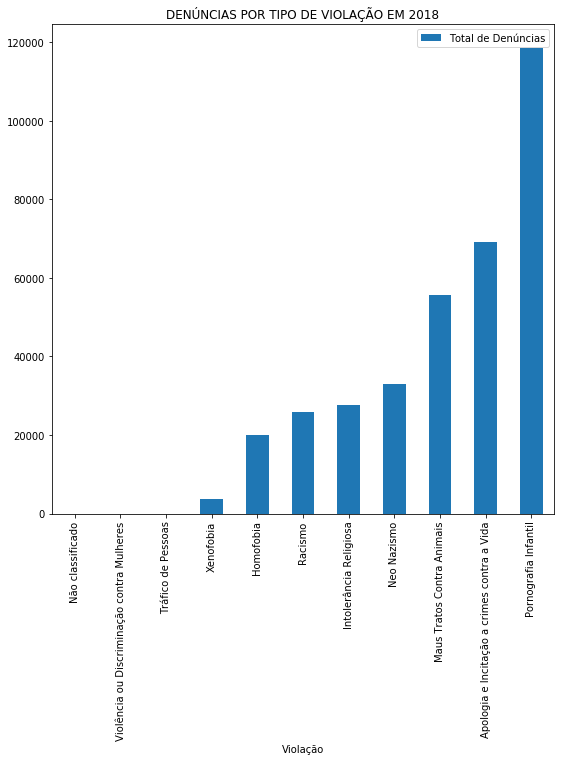

In [142]:
violacao_2018.plot.bar(x = 'Violação', y = 'Total de Denúncias',  
                       title='DENÚNCIAS POR TIPO DE VIOLAÇÃO EM 2018')


### 3.2 - Domínios das páginas denunciadas



In [143]:
dominio_agrupado_ano = dominio[['Total de Denúncias', 'Ano', 'Domínio']].groupby(['Ano', 'Domínio']).sum().reset_index()
dominio_agrupado_ano

,Ano,Domínio,Total de Denúncias
0,2006,facebook.com,1555584
1,2006,google.com.br,49766
2,2006,imgsrc.ru,54385
3,2006,instagram.com,54888
4,2006,orkut.com,2175248
5,2006,orkut.com.br,2381508
6,2006,twitter.com,316788
7,2006,uol.com.br,60747
8,2006,xvideos.com,135756
9,2006,youtube.com,192065


In [144]:
dominio_2018 = dominio_agrupado_ano.loc[dominio_agrupado_ano['Ano'] == 2018].sort_values('Total de Denúncias')
dominio_2018

,Ano,Domínio,Total de Denúncias
121,2018,google.com.br,49872
122,2018,imgsrc.ru,54689
123,2018,instagram.com,58288
127,2018,uol.com.br,60693
128,2018,xvideos.com,136247
129,2018,youtube.com,192176
126,2018,twitter.com,318998
120,2018,facebook.com,1563187
124,2018,orkut.com,1884456
125,2018,orkut.com.br,2381448


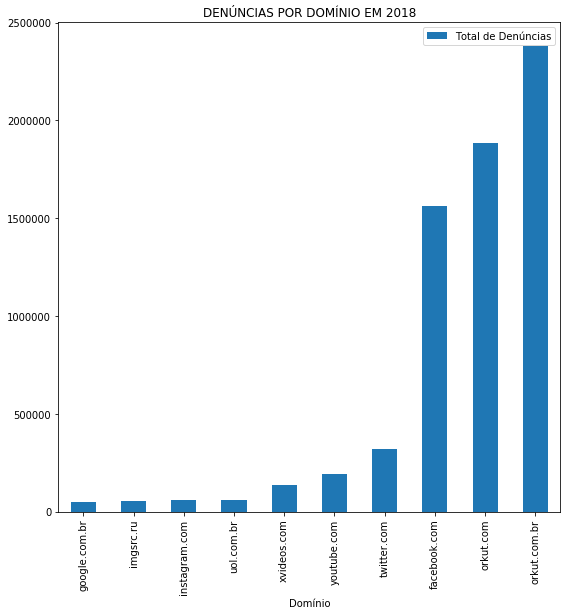

In [145]:
dominio_2018.plot.bar(x = 'Domínio', y = 'Total de Denúncias', title='DENÚNCIAS POR DOMÍNIO EM 2018')

### 3.3 - Idiomas das Denúncias

In [146]:
idioma_agrupado_ano = idioma[['Total de Denúncias', 'Ano', 'Idioma']].groupby(['Ano', 'Idioma']).sum().reset_index()
idioma_agrupado_ano

,Ano,Idioma,Total de Denúncias
0,2006,dutch,55
1,2006,english,7943
2,2006,farsi,9
3,2006,french,95
4,2006,german,12
5,2006,pinyin,0
6,2006,portuguese,3143
7,2006,russian,264
8,2006,spanish,98
9,2006,swedish,1


In [147]:
idioma_2018 = idioma_agrupado_ano.loc[dominio_agrupado_ano['Ano'] == 2018].sort_values('Total de Denúncias')
idioma_2018

,Ano,Idioma,Total de Denúncias
125,2018,pinyin,5
129,2018,swedish,14
122,2018,farsi,29
120,2018,dutch,47
124,2018,german,104
128,2018,spanish,938
123,2018,french,2151
127,2018,russian,9652
126,2018,portuguese,28211
121,2018,english,46012


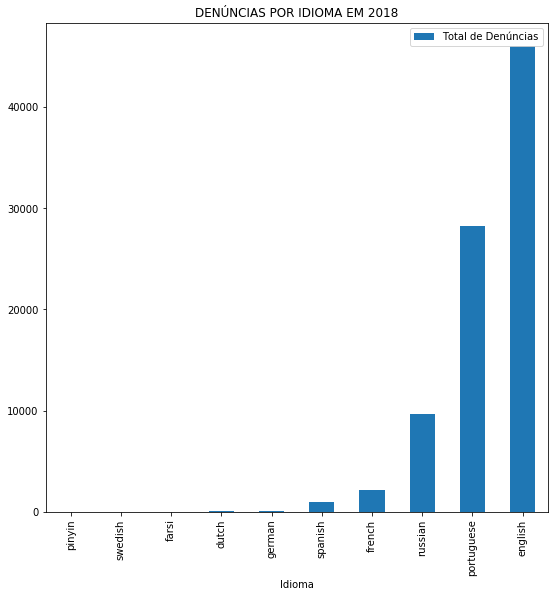

In [148]:
idioma_2018.plot.bar(x = 'Idioma', y = 'Total de Denúncias',  title='DENÚNCIAS POR IDIOMA EM 2018')